In [59]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt

import sys
sys.path.append('../common/')
from common import *

file_path = '2018-AL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2018 RESULTS: GCE ADVANCED LEVEL GENERAL \n1 \n \nCentre NO :10300 Buea Catchment Centre  \nRegis: 0,Sat for 2 or more subjects: , Passed: 0, % Passed: 0.0 \nResults of successful candidate (In Order of Merit)  \nCentre NO :11000 CcasKumba B  \nRegis: 303,Sat for 2 or more subjects: 301, Passed: 193, % Passed: 64.12 \nResults of successful candidate (In Order of Merit)  \nPassed in 5 Subjects: 8 \n(1) EYABI EDWARD EPIE :- BIO-D, CHE-D, PMM-E, FMA-E, PHY-D,  \n(2) KANG BLAISE MUA :- GEO-E, REL-C, ENG-E, ECO-E, HIS-C,  \n(3) BALUMA FLOURIA BAPENDA :- CHE-C, PHY-D, FMA-E, BIO-E, PMM-D,  \n(4) EYAMBE LAWRENCE MOSAMAI :- CHE-C, BIO-D, PHY-C, PMM-C,  \nICT-B,  \n(5) TEMEJUNG JUNIOR TEMBANG :- PMM-C, ICT-C, PHY-C, CHE-C, BIO-C,  \n(6) AKANJI ROZITTA EZOUGA :- BIO-B, CHE-B, PHY-D, PMM-B,  \nFMA-D,  \n(7) TAYIM VALINASH ANOH :- BIO-C, PMM-A, CHE-C, FMA-D,  \nPHY-C,  \n(8) MBASSENGUE HELMAN UGBUTA :- PHY-C, BIO-C, CHE-C, \n PMM-B, FMA-B,  \n \nPassed in 4 Subjects: 29 \n(1) ANYERE AFOR RUTH :- 

In [60]:
pattern = re.compile(r'\(\d+\)\s+([A-Z\s]+)\s*:-\s*([A-Z]{3,5}-[A-E],(?:\s*[A-Z]{3,5}-[A-E],)*)\s*\n')

In [61]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 24560


In [62]:
def top_n_percent(grade_distribution, grade):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while grade <= 25:
        candidates_considered += grade_distribution[grade].count
        grade += 1
    return candidates_considered / (total_candidates*100/70) * 100 # accounting for 70% failure rate

In [63]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

EYABI EDWARD EPIE GPA: 1.60 | 8 points -> {'BIO': 'D', 'CHE': 'D', 'PMM': 'E', 'FMA': 'E', 'PHY': 'D'}
KANG BLAISE MUA GPA: 1.80 | 9 points -> {'GEO': 'E', 'REL': 'C', 'ENG': 'E', 'ECO': 'E', 'HIS': 'C'}
BALUMA FLOURIA BAPENDA GPA: 1.80 | 9 points -> {'CHE': 'C', 'PHY': 'D', 'FMA': 'E', 'BIO': 'E', 'PMM': 'D'}
EYAMBE LAWRENCE MOSAMAI GPA: 3.00 | 15 points -> {'CHE': 'C', 'BIO': 'D', 'PHY': 'C', 'PMM': 'C', 'ICT': 'B'}
TEMEJUNG JUNIOR TEMBANG GPA: 3.00 | 15 points -> {'PMM': 'C', 'ICT': 'C', 'PHY': 'C', 'CHE': 'C', 'BIO': 'C'}
AKANJI ROZITTA EZOUGA GPA: 3.20 | 16 points -> {'BIO': 'B', 'CHE': 'B', 'PHY': 'D', 'PMM': 'B', 'FMA': 'D'}
TAYIM VALINASH ANOH GPA: 3.20 | 16 points -> {'BIO': 'C', 'PMM': 'A', 'CHE': 'C', 'FMA': 'D', 'PHY': 'C'}
MBASSENGUE HELMAN UGBUTA GPA: 3.40 | 17 points -> {'PHY': 'C', 'BIO': 'C', 'CHE': 'C', 'PMM': 'B', 'FMA': 'B'}
ANYERE AFOR RUTH GPA: 1.00 | 4 points -> {'ECO': 'E', 'GEO': 'E', 'ICT': 'E', 'HIS': 'E'}
ACHALLE DENIS TABE GPA: 1.00 | 4 points -> {'GEO': 'E

<BarContainer object of 25 artists>

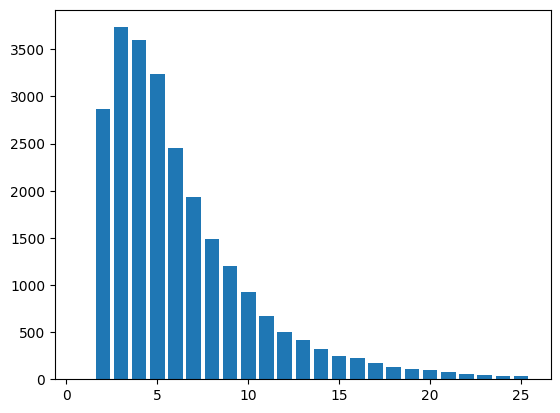

In [64]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

In [65]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
25	: 		32 		: 		0.09%
24	: 		33 		: 		0.19%
23	: 		47 		: 		0.32%
22	: 		53 		: 		0.47%
21	: 		78 		: 		0.69%
20	: 		99 		: 		0.97%
19	: 		112 		: 		1.29%
18	: 		131 		: 		1.67%
17	: 		169 		: 		2.15%
16	: 		221 		: 		2.78%
15	: 		246 		: 		3.48%
14	: 		325 		: 		4.41%
13	: 		419 		: 		5.60%
12	: 		503 		: 		7.03%
11	: 		667 		: 		8.94%
10	: 		922 		: 		11.56%
9	: 		1198 		: 		14.98%
8	: 		1487 		: 		19.22%
7	: 		1931 		: 		24.72%
6	: 		2453 		: 		31.71%
5	: 		3238 		: 		40.94%
4	: 		3598 		: 		51.19%
3	: 		3733 		: 		61.83%
2	: 		2864 		: 		70.00%
1	: 		1 		: 		70.00%


In [66]:
grade_distribution[1].names # List of candidates with 1 point

['KFTCHATEN NGANTCHA C']

In [67]:
dict_candidates["KFTCHATEN NGANTCHA C"] # Candidate has 1 point because the subject Philosophy(PHI) appears twice with 2 Es.
# i.e. (8) KFTCHATEN NGANTCHA C :- PHI-E, PHI-E,

GPA: 1.00 | 1 points -> {'PHI': 'E'}

In [68]:
## All 25 points candidates

print(f"Total {grade_distribution[25].count} candidates with 25 points")
print(f"Candidates with 25 points(top {top_n_percent(grade_distribution, 25):.2f}%):")
for candidate in grade_distribution[25].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 32 candidates with 25 points
Candidates with 25 points(top 0.09%):
	 EPOI DIDI DANIEL MAELLE        	 GPA: 5.00 | 25 points -> {'PHY': 'A', 'FMA': 'A', 'PMM': 'A', 'CHE': 'A', 'BIO': 'A'}
	 TIKU ROY AKURO                 	 GPA: 5.00 | 25 points -> {'FMA': 'A', 'PHY': 'A', 'PMM': 'A', 'CHE': 'A', 'BIO': 'A'}
	 MBINKAR MONIQUE KERNYUY        	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 FOTSO SOUOP ARMEL GIOVANY      	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 NKENGANYI AKA ELVIRA           	 GPA: 5.00 | 25 points -> {'PHY': 'A', 'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A'}
	 ANYU KIMBERLY JENNY CHE        	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 LONGATIE MASSA MANGYE HOPE     	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 ADE FRU GEORGE                 	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 

In [69]:
## All 24 points candidates

print(f"Total {grade_distribution[24].count} candidates with 24 points")
print(f"Candidates with 24 points(top {top_n_percent(grade_distribution, 24):.2f}%):")
for candidate in grade_distribution[24].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 33 candidates with 24 points
Candidates with 24 points(top 0.19%):
	 OMBUCHUM MICAH ANJI            	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 CHEUNWI DANIEL NGANECK         	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 FOADIENG NGUESSOM AUDE MARINA  	 GPA: 4.80 | 24 points -> {'FMA': 'B', 'CHE': 'A', 'BIO': 'A', 'PMM': 'A', 'PHY': 'A'}
	 NDIFOR NADINE FRINWIE          	 GPA: 4.80 | 24 points -> {'BIO': 'B', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 NANA GEORGE FRU                	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 MBANGA RAWLINGS ASAA           	 GPA: 4.80 | 24 points -> {'ECO': 'A', 'FRE': 'A', 'GEO': 'B', 'PMS': 'A', 'FMA': 'A'}
	 LONGATIE FOZOH II BLESS        	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 YOSIMBI LOVETT MENGJIO         	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 

In [70]:
## All 23 points candidates

print(f"Total {grade_distribution[23].count} candidates with 23 points")
print(f"Candidates with 23 points(top {top_n_percent(grade_distribution, 23):.2f}%):")
for candidate in grade_distribution[23].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 47 candidates with 23 points
Candidates with 23 points(top 0.32%):
	 NGUEPI TANFACK CROWN BERLIOZ   	 GPA: 4.60 | 23 points -> {'PHY': 'A', 'FMA': 'A', 'PMM': 'A', 'CHE': 'C', 'BIO': 'A'}
	 SANOU LIOMO CORNEILLE          	 GPA: 4.60 | 23 points -> {'FMA': 'A', 'BIO': 'B', 'PHY': 'A', 'PMM': 'A', 'CHE': 'B'}
	 NKWESCHEU KOM SERGES LOIC      	 GPA: 4.60 | 23 points -> {'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A', 'CSC': 'C'}
	 OJONG EUGENE WARREN ESSINDI    	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'PHY': 'B', 'PMM': 'A', 'FMA': 'B'}
	 NGUH DANIEL NDANGSA            	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 ASONGWE BRANDON BAH            	 GPA: 4.60 | 23 points -> {'BIO': 'B', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 NJIOMUO SATCHIE THEO DYLAND    	 GPA: 4.60 | 23 points -> {'PHY': 'A', 'FMA': 'B', 'PMM': 'A', 'CHE': 'B', 'BIO': 'A'}
	 AWARADIA TINARENA ABAMBE       	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 

In [71]:
## All 22 points candidates

print(f"Total {grade_distribution[22].count} candidates with 22 points")
print(f"Candidates with 22 points(top {top_n_percent(grade_distribution, 22):.2f}%):")
for candidate in grade_distribution[22].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 53 candidates with 22 points
Candidates with 22 points(top 0.47%):
	 PETER NJIE MBUA JUNIOR         	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'D', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 NORIS ANUBONDEM ATSINA         	 GPA: 4.40 | 22 points -> {'PHY': 'A', 'FMA': 'A', 'PMM': 'A', 'CHE': 'B', 'BIO': 'C'}
	 NJIKEP MPAKO JORDAN            	 GPA: 4.40 | 22 points -> {'FMA': 'B', 'PHY': 'A', 'PMM': 'A', 'CHE': 'B', 'BIO': 'B'}
	 ATEMBA LISE PHONJAM            	 GPA: 4.40 | 22 points -> {'BIO': 'B', 'CHE': 'A', 'FSN': 'A', 'PMS': 'A', 'PHY': 'C'}
	 FONKWO PETER NDEBEH JUNIOR     	 GPA: 4.40 | 22 points -> {'BIO': 'B', 'CHE': 'B', 'PMM': 'A', 'PHY': 'A', 'FMA': 'B'}
	 MUNGOH BRYAN FUNUE ABONGWA     	 GPA: 4.40 | 22 points -> {'BIO': 'B', 'CHE': 'C', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 CHOVES SANGTUM FOINJUNG        	 GPA: 4.40 | 22 points -> {'ECO': 'A', 'GEO': 'B', 'PHI': 'A', 'ENG': 'B', 'PMS': 'B'}
	 BALEN BUYUH ASANGBEH           	 GPA: 4.40 | 22 points -> {'PMM': 'A', 'BIO': 

In [72]:
## All 21 points candidates

print(f"Total {grade_distribution[21].count} candidates with 21 points")
print(f"Candidates with 21 points(top {top_n_percent(grade_distribution, 21):.2f}%):")
for candidate in grade_distribution[21].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 78 candidates with 21 points
Candidates with 21 points(top 0.69%):
	 THOM GUEMTO SINCLAIR           	 GPA: 4.20 | 21 points -> {'PHY': 'B', 'FMA': 'C', 'PMM': 'A', 'CHE': 'B', 'BIO': 'A'}
	 TIKOU DJUIFFO YVANNA           	 GPA: 4.20 | 21 points -> {'PHY': 'B', 'FMA': 'A', 'PMM': 'A', 'CHE': 'C', 'BIO': 'B'}
	 FINDO PETER KAMPETE            	 GPA: 4.20 | 21 points -> {'PMM': 'A', 'PHY': 'B', 'BIO': 'B', 'CHE': 'B', 'FMA': 'B'}
	 BENI SONITA NYANG              	 GPA: 4.20 | 21 points -> {'CHE': 'A', 'FMA': 'B', 'PHY': 'B', 'BIO': 'A', 'PMM': 'C'}
	 VALENTINA WALTERS NING TEBOH   	 GPA: 4.20 | 21 points -> {'CHE': 'B', 'PMM': 'A', 'BIO': 'A', 'FMA': 'C', 'PHY': 'B'}
	 OBEN TABENDIP TABIAYUK         	 GPA: 4.20 | 21 points -> {'PMM': 'A', 'FMA': 'A', 'PHY': 'B', 'CSC': 'C', 'CHE': 'B'}
	 FOSSUNG SHALOM ABON            	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'C', 'PHY': 'B'}
	 NCHENDIA JOEL ABUNGABEOH       	 GPA: 4.20 | 21 points -> {'CHE': 'D', 'BIO': 

In [73]:
## All 20 points candidates

print(f"Total {grade_distribution[20].count} candidates with 20 points")
print(f"Candidates with 20 points(top {top_n_percent(grade_distribution, 20):.2f}%):")
for candidate in grade_distribution[20].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 99 candidates with 20 points
Candidates with 20 points(top 0.97%):
	 ATEMAFAC TENDEM                	 GPA: 4.00 | 20 points -> {'BIO': 'B', 'CHE': 'B', 'PMM': 'B', 'FMA': 'B', 'PHY': 'B'}
	 NGOUMOU TITUS YANNICK          	 GPA: 4.00 | 20 points -> {'PHY': 'C', 'FMA': 'B', 'PMM': 'A', 'CHE': 'C', 'BIO': 'A'}
	 WETKA TCHOUPE ULRICH PARFAIT L 	 GPA: 4.00 | 20 points -> {'PMM': 'A', 'PHY': 'B', 'FMA': 'C', 'CHE': 'B', 'BIO': 'B'}
	 AZAMBOU NDONGMO JOHAN ARSENE   	 GPA: 4.00 | 20 points -> {'CHE': 'C', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A', 'CSC': 'D'}
	 BEBONGCHU ATEMKENG BELTUS      	 GPA: 5.00 | 20 points -> {'BIO': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 ZOFOA SMITH NTOHTEWO           	 GPA: 4.00 | 20 points -> {'PMM': 'A', 'FMA': 'B', 'PHY': 'A', 'CHE': 'A', 'CSC': 'E'}
	 NJOKOM ALAIN JUNIOR NSHANUI    	 GPA: 4.00 | 20 points -> {'CHE': 'C', 'PHY': 'B', 'PMM': 'A', 'CSC': 'B', 'FMA': 'B'}
	 PRECIOUS AKAPETA EPOHARA OBEN  	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 

In [74]:
## All 19 points candidates

print(f"Total {grade_distribution[19].count} candidates with 19 points")
print(f"Candidates with 19 points(top {top_n_percent(grade_distribution, 19):.2f}%):")
for candidate in grade_distribution[19].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 112 candidates with 19 points
Candidates with 19 points(top 1.29%):
	 JOHN RICHMAN NWIBING           	 GPA: 3.80 | 19 points -> {'PHY': 'B', 'BIO': 'C', 'CHE': 'C', 'PMM': 'A', 'FMA': 'B'}
	 BOUJIQUE LAH EVARISTE JOEL     	 GPA: 3.80 | 19 points -> {'CHE': 'B', 'FMA': 'C', 'CSC': 'C', 'PMM': 'B', 'PHY': 'A'}
	 FURAH OGBONA OKORO             	 GPA: 3.80 | 19 points -> {'PMM': 'A', 'CHE': 'C', 'BIO': 'C', 'PHY': 'B', 'FMA': 'B'}
	 NDA SANDRA EGWAR               	 GPA: 3.80 | 19 points -> {'PHY': 'A', 'BIO': 'C', 'CHE': 'B', 'PMM': 'B', 'FMA': 'C'}
	 KONGOR DILIGENT ASOHNYU        	 GPA: 3.80 | 19 points -> {'PHY': 'B', 'CHE': 'B', 'PMM': 'A', 'FMA': 'C', 'CSC': 'C'}
	 FORSTER ROPHINE NSOH           	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'B', 'FMA': 'C', 'PHY': 'D'}
	 DOHNJENKA ROSE NAHBUM          	 GPA: 3.80 | 19 points -> {'BIO': 'B', 'CHE': 'A', 'PMM': 'B', 'FMA': 'C', 'PHY': 'C'}
	 NJEI CLOVIS MBAH               	 GPA: 3.80 | 19 points -> {'BIO': 'B', 'CHE':